In [213]:
import sympy as smp
import numpy as np
import scipy

from scipy.optimize import  curve_fit
from sklearn.metrics import r2_score

import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'notebook', 'grid'])

In [214]:
m = np.array([0.06,23.81,43.54, 63.29, 83.29, 103.27, 122.81, 142.74, 163.29, 181.42])*1e-3
L = np.array([42.5,67.0, 95.0, 122.8,150.8, 178.9, 207.2, 233.8, 262.1, 283.3])*1e-2

delta_m = 0.01*1e-3
delta_L = 0.1*1e-2

g = 9.79

In [215]:
#P = k*(L - L_0) = k*L - k*L_0

P = m*g

x_data = L
y_data = P

x_err = delta_L
y_err = g*delta_m

In [216]:
def func(x,a, b):
    return a*x + b

popt, pcov = curve_fit(func, x_data, y_data)
a, b = popt
a_err, b_err = np.sqrt(np.diag(pcov))
r2 = r2_score(y_data, func(x_data, *popt))
print('a = ', a)
print('b = ', b)
print(r'r^2 =', r2)
print('a_err = ', a_err)
print('b_err = ', b_err)

a =  0.7169591223570427
b =  -0.27020854164961783
r^2 = 0.9991789454763595
a_err =  0.00726630728480236
b_err =  0.01323376934878309


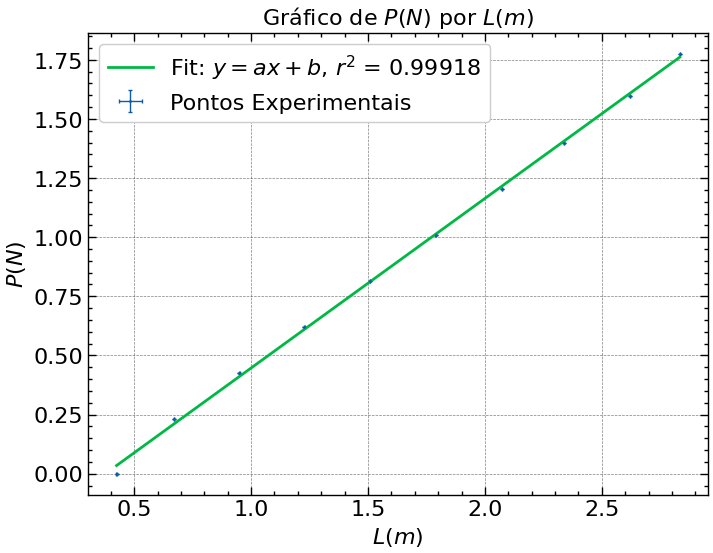

In [217]:
plt.errorbar(x_data, y_data, xerr = x_err, yerr = y_err, marker = 'o', ls = '', ms = 1,capsize=1.5, elinewidth=1,label ="Pontos Experimentais")
plt.title(r'Gráfico de $P(N)$ por $L(m)$')

plt.xlabel(r'$L(m)$')
plt.ylabel(r'$P(N)$')

func = lambda x: a*x + b
plt.plot(x_data, func(x_data) , label= r'Fit: $y = ax + b$, $r^2$ = %.5f' % (r2))
plt.legend()

In [218]:
#parâmetros molo
k = a
k_err = a_err

L_0 = -b/a
L_0_err = np.abs(1/a) * b_err + np.abs(b/(a**2)) * a_err

print('k = ' + str(k) + ' +- ' + str(a_err) )

print('L_0 = ' + str(L_0) + ' +- ' + str(L_0_err) )

k = 0.7169591223570427 +- 0.00726630728480236
L_0 = 0.3768813775062828 +- 0.02227784646236665


In [219]:
#parâmetros gerais

h_max = 301.5 *1e-2
h_max_err = 0.2 *1e-2

L_laser = 196.5*1e-2
L_laser_err = 0.1*1e-2

h_laser = h_max -L_laser
h_laser_err = h_max_err + L_laser_err

M = 124.01*1e-3
M_err = 0.01*1e-3

D = 80.35 *1e-3
D_err = 0.05*1e-3

h_cm = D/2
h_cm_err = D_err/2

In [220]:
#cáculo da velocidade

t = np.array([0.052386, 0.058401, 0.053486, 0.053400, 0.053239, 0.052108, 0.052383, 0.052714, 0.053076, 0.053816, 0.053152, 0.052948, 0.053733, 0.053409])
t_err = 0.000001

v = D/t
v_m = np.mean(v)
v_m_err = np.std(v, ddof=1)

print('v = '+ str(v_m) + ' +- ' + str(v_m_err))

v = 1.5044209649305296 +- 0.039831982245676086


In [221]:
#cálculo da enrgia inical

E_i = M*g*h_cm + k* (h_max - h_cm - L_0)**2 /2
E_i_err = M_err*g*h_cm + M*g*h_cm_err + k_err*(h_max - h_cm - L_0)**2 /2 + k*np.abs((h_max - h_cm - L_0)) *(h_max_err + h_cm_err + L_0_err)

print('E_i = '+ str(E_i) + ' +- ' + str(E_i_err))

E_i = 2.4682648452061215 +- 0.06982252146009604


In [222]:
#Cálculo da energia final

E_f = M*g*h_laser + k*(L_laser - L_0)**2 /2 + M*v_m**2/2
E_f_err = M_err*g*h_laser + M*g*h_laser_err + k_err*(L_laser - L_0)**2 /2 + k*np.abs((L_laser- L_0)) *(L_laser_err+ L_0_err) + M_err *v_m**2/2 + M*v_m*v_m_err

print('E_f = '+ str(E_f) + ' +- ' + str(E_f_err))

E_f = 2.3192243656404674 +- 0.04685525269365835


In [223]:
print(str(np.abs(E_f - E_i)) + ' < ' + str(2*(E_i_err + E_f_err)) )

0.14904047956565414 < 0.2333555483075088
